In [1]:
import pandas as pd
import numpy as np

In [2]:
quarterly910 = pd.read_csv('./../output/Quarterly2019-01-16_10_05Final/Quarterly_9_1_0_LB0.csv')
quarterly910

,Q1196,7963.17,8588.11,8186.43,7933.46,8030.54,8658.68,8241.17,7971.4
0,Q3782,9966.330,9934.400,9943.020,9971.910,9952.500,9933.320,9938.930,9971.920
1,Q13833,11335.500,11514.200,11504.200,11592.500,11308.900,11545.300,11579.000,11720.400
2,Q20924,9954.430,9671.480,9566.530,9851.540,10097.200,9885.220,9700.580,9825.740
3,Q22403,2546.110,2531.370,2558.470,2546.020,2546.070,2549.160,2583.220,2576.440
4,Q6645,13883.500,14069.700,14147.400,14344.600,14433.900,14720.600,14815.700,15098.400
5,Q5043,5746.790,6402.200,6240.340,6205.140,6248.670,6770.770,6654.720,6649.510
6,Q11784,12433.200,12466.800,12512.600,12703.800,12680.200,12709.900,12741.900,12937.400
7,Q1103,4518.470,4533.180,4580.810,4627.860,4633.750,4657.870,4698.660,4747.860
8,Q13183,2785.760,2702.640,2799.010,2844.810,2807.920,2765.890,2889.000,2923.370
9,Q8702,3356.220,2852.770,3303.340,3270.280,3511.630,2990.480,3574.830,3207.580


In [3]:
#function that handles the entire transformation process for dataframes containing the forecast outputs from 
def transformer(outframe): 
    #add current headers as last column
    last_entry = list(outframe.keys())
      #make a new data frame for last col and append it to input df
    append_frame = pd.DataFrame([last_entry], columns=last_entry)
    updated = outframe.append(append_frame, ignore_index=True)
    
    #rename column headings
      #build map of old column headings to their replacement
    rename_map = dict()
    keys = list(outframe.keys())
    for i in range(len(keys)): 
        rename_map[keys[i]] = 'V' + str(i+1)
    rename_map
    
      #modify headers to mirror that of the dataframe
    updated = updated.rename(index=int, columns=rename_map)
    
    return updated

In [5]:
quarterly910 = transformer(pd.read_csv('./../output/Quarterly2019-01-16_10_05Final/Quarterly_9_1_0_LB0.csv'))
quarterly911 = transformer(pd.read_csv('./../output/Quarterly2019-01-16_10_05Final/Quarterly_9_1_1_LB0.csv'))
quarterly912 = transformer(pd.read_csv('./../output/Quarterly2019-01-16_10_05Final/Quarterly_9_1_2_LB0.csv'))
quarterly920 = transformer(pd.read_csv('./../output/Quarterly2019-01-16_10_05Final/Quarterly_9_2_0_LB0.csv'))
quarterly921 = transformer(pd.read_csv('./../output/Quarterly2019-01-16_10_05Final/Quarterly_9_2_1_LB0.csv'))
quarterly922 = transformer(pd.read_csv('./../output/Quarterly2019-01-16_10_05Final/Quarterly_9_2_2_LB0.csv'))

In [6]:
#load test data
test_quarterly = pd.read_csv('./../Test/Quarterly-test.csv')
test_quarterly

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,Q1,6790.643698,6598.952202,6608.527173,6765.914014,6992.949003,6931.539000,7161.240869,6981.304105
1,Q2,7081.709669,6789.414723,6895.838545,7050.508939,7155.206969,7075.445000,7373.832383,7339.981903
2,Q3,7188.893596,6986.330400,7025.162033,7066.270724,7129.545542,7079.719000,7242.259002,7043.345329
3,Q4,7679.102564,7483.094657,7510.212380,7600.148193,7714.398010,7677.571000,7922.636157,7707.159526
4,Q5,1150.000000,995.000000,1083.000000,1465.000000,1079.000000,948.000000,1298.000000,1763.000000
5,Q6,9761.300000,9808.800000,9912.100000,9985.600000,10009.800000,9980.300000,10102.600000,10168.400000
6,Q7,3345.600000,3378.100000,3376.100000,3389.100000,3421.600000,3409.300000,3433.600000,3452.900000
7,Q8,2618.800000,2622.700000,2656.900000,2695.400000,2669.300000,2676.700000,2750.000000,2778.700000
8,Q9,2455.900000,2468.400000,2483.600000,2508.100000,2506.400000,2503.800000,2527.000000,2528.800000
9,Q10,2524.500000,2538.000000,2567.100000,2563.800000,2562.000000,2551.100000,2569.900000,2581.800000


In [7]:
#function to find mean mae between two df's
def mae_finder(forecast, test): 
    total_mae = np.zeros(8) #mape for values v2 through v8
    
    for index, val in forecast.iterrows(): 
        forecast_code = forecast['V1'][index]
        test_index = int(forecast_code[1:]) - 1

        #isolate rows relevant to the mape
        test_row = list(test.iloc[test_index])
        forecast_row = list(forecast.iloc[index])
        #calculate the mae
        row_mae = np.absolute(np.asarray(test_row[1:], dtype=float) - np.asarray(forecast_row[1:], dtype=float))
#         print(forecast_code, test_row[1], forecast_row[1])

        total_mae = np.add(total_mae, row_mae)
    
    average_mae = total_mae * 1/(forecast.shape[0])
    return average_mae

mae_finder(quarterly910, test_quarterly)

array([308.96211001, 397.91577315, 456.18793109, 515.84167931,
       588.53980593, 652.53190271, 700.01172281, 746.78732059])

In [8]:
#find MAE for each of the forecast files
mae910 = mae_finder(quarterly910, test_quarterly)
mae911 = mae_finder(quarterly911, test_quarterly)
mae912 = mae_finder(quarterly912, test_quarterly)
mae920 = mae_finder(quarterly920, test_quarterly)
mae921 = mae_finder(quarterly921, test_quarterly)
mae922 = mae_finder(quarterly922, test_quarterly)

In [9]:
print(mae910)
print(mae911)
print(mae912)
print(mae920)
print(mae921)
print(mae922)

[308.96211001 397.91577315 456.18793109 515.84167931 588.53980593
 652.53190271 700.01172281 746.78732059]
[317.69561195 406.98731278 448.95936218 510.64312613 585.88064271
 654.22979036 699.39111315 734.51823288]
[309.06047725 393.05978755 449.29351596 500.34833131 580.76258817
 647.83754269 696.23386745 737.8567271 ]
[328.04388295 405.57146454 455.93666913 518.51271116 599.70302105
 659.46899925 699.55660556 743.45585613]
[320.28650986 396.45696385 462.82188907 519.60971893 595.04959443
 648.00065885 700.57551582 749.84192092]
[323.75163132 409.78456323 462.39853919 527.95867532 599.22912357
 656.06311578 706.17948724 748.01748845]


In [10]:
import matplotlib.pyplot as plt

In [11]:
n_groups = 8
tup910 = tuple(mae910)
tup911 = tuple(mae911)
tup912 = tuple(mae912)
tup920 = tuple(mae920)
tup921 = tuple(mae921)
tup922 = tuple(mae922)

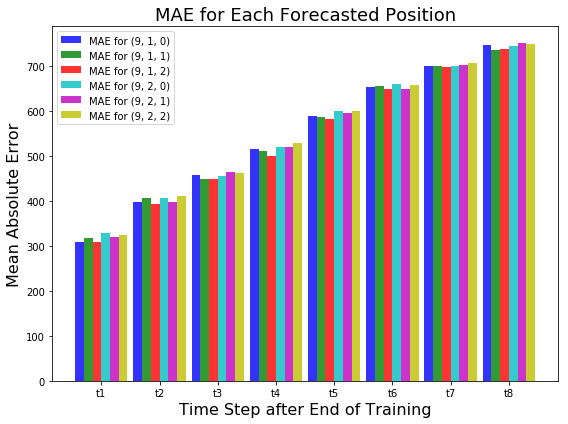

In [12]:
#MAE GRAPH
# create plot
fig, ax = plt.subplots(figsize=(8, 6))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

#data for bars
rects1 = plt.bar(index, tup910, bar_width,
                 alpha=opacity,
                 color='b',
                 label='MAE for (9, 1, 0)')
 
rects2 = plt.bar(index + bar_width, tup911, bar_width,
                 alpha=opacity,
                 color='g',
                 label='MAE for (9, 1, 1)')
 
rects3 = plt.bar(index + 2 * bar_width, tup912, bar_width,
                 alpha=opacity,
                 color='r',
                 label='MAE for (9, 1, 2)')
 
rects4 = plt.bar(index + 3 * bar_width, tup920, bar_width,
                 alpha=opacity,
                 color='c',
                 label='MAE for (9, 2, 0)')

rects5 = plt.bar(index + 4 * bar_width, tup921, bar_width,
                 alpha=opacity,
                 color='m',
                 label='MAE for (9, 2, 1)')
 
rects6 = plt.bar(index + 5 * bar_width, tup922, bar_width,
                 alpha=opacity,
                 color='y',
                 label='MAE for (9, 2, 2)')

#fill in plot details
plt.xlabel('Time Step after End of Training', fontsize=16)
plt.ylabel('Mean Absolute Error', fontsize=16)
plt.title('MAE for Each Forecasted Position', fontsize=18)
plt.xticks(index + bar_width * 2.5, ('t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8'))
plt.legend()

#show plot
plt.tight_layout()
plt.show()

In [13]:
#MEAN MAE CALCULATION
mean_mae = list(np.mean([mae910, mae911, mae912, mae920, mae921, mae922], axis=0))
mean_mae

[317.96670388970944,
 401.62931084871656,
 455.9329844358737,
 515.485707027718,
 591.527462644222,
 653.0220016062417,
 700.324718672281,
 743.4129243453746]

No handles with labels found to put in legend.


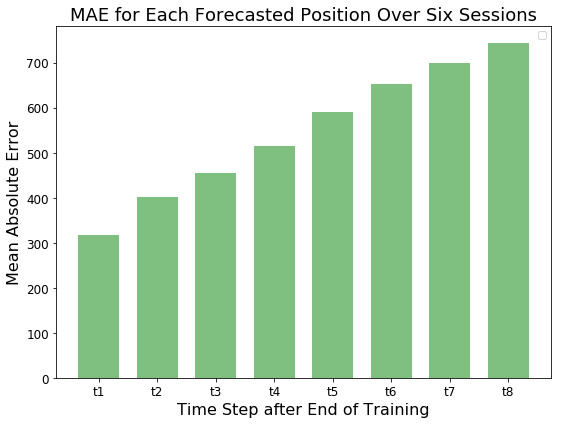

In [14]:
#MAPE GRAPH
# create plot
fig, ax = plt.subplots(figsize=(8, 6))
index = np.arange(n_groups)
bar_width = 0.7
opacity = 0.5

#data for bars
rects1 = plt.bar(index, tuple(mean_mae), bar_width,
                 alpha=opacity,
                 color='g')

#fill in plot details
plt.xlabel('Time Step after End of Training', fontsize=16)
plt.ylabel('Mean Absolute Error', fontsize=16)
plt.title('MAE for Each Forecasted Position Over Six Sessions', fontsize=18)
plt.xticks(index, ('t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8'), fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

#show plot
plt.tight_layout()
plt.show()

In [15]:
#function to find mean mape between two df's
def mape_finder(forecast, test): 
    total_mape = np.zeros(8) #mape for values v2 through v8
    
    for index, val in forecast.iterrows(): 
        forecast_code = forecast['V1'][index]
        test_index = int(forecast_code[1:]) - 1

        #isolate rows relevant to the mape
        test_row = list(test.iloc[test_index])
        forecast_row = list(forecast.iloc[index])
        #calculate the mae
        row_mape = np.absolute(np.divide(np.asarray(test_row[1:], dtype=float) - np.asarray(forecast_row[1:], dtype=float), 
                                         np.asarray(test_row[1:], dtype=float)))
#         print(forecast_code, test_row[1], forecast_row[1])

        total_mape = np.add(total_mape, row_mape)
    
    average_mape = total_mape * 1/(forecast.shape[0]) * 100
    return average_mape

mape_finder(quarterly910, test_quarterly)

array([ 6.09254532,  8.13991257,  9.60668219, 10.72591707, 12.74998037,
       13.97945109, 14.50403842, 16.25036052])

In [16]:
#find MAPE for each of the forecast files
mape910 = mape_finder(quarterly910, test_quarterly)
mape911 = mape_finder(quarterly911, test_quarterly)
mape912 = mape_finder(quarterly912, test_quarterly)
mape920 = mape_finder(quarterly920, test_quarterly)
mape921 = mape_finder(quarterly921, test_quarterly)
mape922 = mape_finder(quarterly922, test_quarterly)

In [17]:
#MEAN MAPE CALCULATION
mean_mape = list(np.mean([mape910, mape911, mape912, mape920, mape921, mape922], axis=0))
mean_mape

[6.104821694316674,
 8.060104385387103,
 9.348758277030383,
 10.483381270419134,
 12.254125362033001,
 13.735441922444288,
 14.245988297894357,
 15.813211872628509]

No handles with labels found to put in legend.


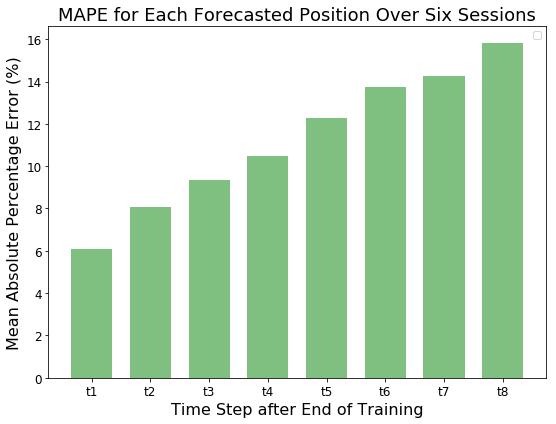

In [18]:
#MAPE GRAPH
# create plot
fig, ax = plt.subplots(figsize=(8, 6))
index = np.arange(n_groups)
bar_width = 0.7
opacity = 0.5

#data for bars
rects1 = plt.bar(index, tuple(mean_mape), bar_width,
                 alpha=opacity,
                 color='g')

#fill in plot details
plt.xlabel('Time Step after End of Training', fontsize=16)
plt.ylabel('Mean Absolute Percentage Error (%)', fontsize=16)
plt.title('MAPE for Each Forecasted Position Over Six Sessions', fontsize=18)
plt.xticks(index, ('t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8'), fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

#show plot
plt.tight_layout()
plt.show()

In [20]:
#second sanity check: make sure training and test data are continuous without any weird behaviors
train_quarterly = pd.read_csv('./../Train/quarterly-train.csv')
train_quarterly

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V858,V859,V860,V861,V862,V863,V864,V865,V866,V867
0,Q1,7407.412314,7528.566074,7374.709225,7395.514848,7654.007989,7686.847835,7578.190743,7904.376716,7744.049254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q2,7552.454619,7541.774571,7466.568336,7550.333354,8067.131522,8063.701017,7901.029312,8155.387316,8031.010328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Q3,8463.842193,8366.102309,8269.502192,8256.985325,8726.917647,8733.243591,8664.260087,8717.394568,8662.139727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Q4,8498.941194,8409.926442,8391.441381,8292.860310,8798.521118,8753.990355,8740.062556,8695.540651,8627.447488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Q5,1835.000000,2322.000000,3059.000000,1883.000000,1896.000000,2060.000000,2764.000000,1743.000000,1561.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Q6,8873.000000,8949.000000,8929.900000,8986.300000,8943.200000,8979.000000,8965.900000,8892.700000,8857.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Q7,3431.000000,3418.300000,3385.300000,3447.100000,3435.400000,3431.700000,3388.000000,3371.700000,3360.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Q8,2599.100000,2626.500000,2607.000000,2628.200000,2558.300000,2567.300000,2558.700000,2513.500000,2457.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Q9,2856.200000,2869.800000,2874.800000,2873.400000,2861.600000,2849.000000,2822.800000,2779.200000,2793.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Q10,2329.000000,2349.900000,2332.900000,2381.500000,2382.600000,2405.000000,2411.000000,2428.500000,2391.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#combine training and test data for a single row
index = np.random.choice(24000) #24000 is the number of time series provided in the dataset
print("Index: ", index)
print("Time series: Q" + str(index+1))

#extract the training and test portions from respective df's
train_row = list(train_quarterly.iloc[index])
train_row = [x for x in train_row if not pd.isnull(x)][1:]
# print(train_row)
test_row = list(test_quarterly.iloc[index])[1:]
# print(test_row)

#put training and test portions together to form a single array
ts = train_row + test_row
#ts

Index:  13356
Time series: Q13357


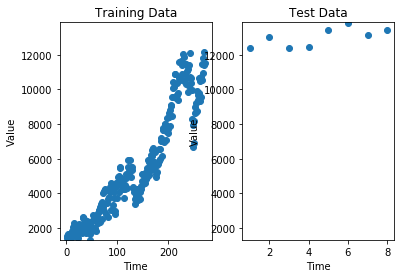

In [22]:
#plot for training
xtrain = list(range(1, len(train_row) + 1))
ytrain = train_row

#yrange for plot
ymin = min(ts) - 10
ymax = max(ts) + 10

plt.subplot(1, 2, 1)
plt.scatter(xtrain,ytrain)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Training Data')
axes = plt.gca()
axes.set_ylim([ymin, ymax])


#plot for test data
xtest = list(range(1, len(test_row) + 1))
ytest = test_row

plt.subplot(1, 2, 2)
plt.scatter(xtest, ytest)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Test Data')
axes = plt.gca()
axes.set_ylim([ymin, ymax])

#display a plot to ensure that the training and test data we are using appear to be correct (i.e. the test data sequentially
#follows the training data)
plt.show()